# 1. Introduction

## 1.1. Project Overview

This project focuses on analyzing public sentiment from Tweets regarding Apple and Google products. The main goal is to build a Natural Language Processing (NLP) model that can classify the sentiment of a Tweet as positive, negative, or neutral based on its content.

The data, sourced from [CrowdFlower](https://data.world/crowdflower/brands-and-product-emotions), contains over 9,000 Tweets labeled by human raters. By analyzing this data, the model will help Apple and Google better understand customer perceptions of their products, allowing them to make informed decisions for marketing, customer service, and product development.

We will begin by preprocessing the Tweets, transforming them into a numerical format suitable for machine learning models, and training several classification algorithms to evaluate their performance.


## 1.2. Business Problem & Stakeholder

### Business Problem:
Public perception of tech products can heavily influence a company's sales, customer satisfaction, and brand loyalty. For companies like Apple and Google, understanding how customers feel about their products can provide valuable insights into areas for improvement, marketing strategies, and product development. 

In this project, we aim to develop a model that automatically classifies the sentiment of Tweets regarding Apple and Google products as positive, negative, or neutral. This can help companies quickly gauge public sentiment at scale, providing actionable insights for decision-making.

### Stakeholders:
- **Apple and Google Product Teams:** Use sentiment data to improve products and address customer pain points.
- **Marketing Departments:** Tailor campaigns to target sentiment-driven messaging.
- **Customer Support Teams:** Identify negative feedback more quickly to address concerns.
- **Executives/Decision Makers:** Gain a high-level view of public opinion, enabling better strategic planning.


## 1.3. Dataset Description

The dataset used in this project comes from [CrowdFlower](https://data.world/crowdflower/brands-and-product-emotions), containing over 9,000 Tweets. Each Tweet has been labeled by human raters with one of three sentiment categories: positive, negative, or neither. The dataset contains the following key columns:

### Key Features of the Dataset:
- **Text**: The actual content of the Tweet, which we will analyze for sentiment classification.
- **Brand/Product**: The specific product or brand mentioned in the Tweet, such as `iPhone`, `Google`, or `iPad`.
- **Emotion**: The sentiment label, representing whether the sentiment expressed in the Tweet is `Positive emotion`, `Negative emotion`, or neutral.

### Target Variable:
- **Emotion**: This will be the target variable, as it captures the sentiment associated with each Tweet.

The dataset will be used to train and evaluate models that can predict the sentiment of unseen Tweets based on their text content.


## 1.4. Objectives

### Specific Objective
- Develop a Natural Language Processing (NLP) model to accurately classify the sentiment of Tweets about Apple and Google products into three categories: positive, negative, and neutral.

### Additional Objectives

1. **Data Preprocessing**: Clean and prepare the Tweet data for analysis, which includes handling missing values, normalizing text (removing URLs, special characters, etc.), and tokenization.

2. **Exploratory Data Analysis (EDA)**: Conduct exploratory analysis to understand the distribution of sentiments in the dataset, identify any patterns, and visualize key aspects of the data.

3. **Model Development**: Implement and train various classification models (e.g., Logistic Regression, Support Vector Machines, and Naive Bayes) to classify the sentiment of Tweets.

4. **Model Evaluation**: Evaluate the performance of the models using appropriate metrics such as accuracy, precision, recall, and F1 score, especially focusing on multiclass classification metrics.

5. **Iterative Improvement**: Based on initial results, refine the models by incorporating advanced techniques such as feature engineering, hyperparameter tuning, or using pre-trained embeddings like Word2Vec or BERT.

6. **Conclusion and Recommendations**: Summarize the findings, discuss the model's effectiveness, and provide actionable recommendations for stakeholders based on the analysis.


# 2. Data Understanding & Exploration

## 2.1. Data Loading & Initial Exploration

In this step, we will:

1. Load the dataset.
2. Display the first few rows to understand the structure.
3. Check the data types of each column.
4. Identify missing values and duplicates.
5. Analyze the class distribution to check for potential imbalance.
6. Perform basic descriptive statistics (e.g., distribution of Tweet lengths and word counts).

In [1]:
# Importing the necessary libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Display settings
%matplotlib inline
plt.style.use('ggplot')  # for nicer visualizations
sns.set_palette("Set2")  # Set Seaborn color palette

In [2]:
# Load the dataset
raw_data = pd.read_csv("judge-1377884607_tweet_product_company.csv", encoding = "latin1")

In [3]:
# Display the first 5 rows
raw_data.head()

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion


The column names seem to be unnecessarily long, we'll rename them to improve readability.

In [4]:
# Renaming the columns
raw_data.columns = ["Text", "Brand/Product", "Emotion"]
raw_data.head()

,Text,Brand/Product,Emotion
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion


In [5]:
# Checking the number of raws and columns
raw_data.shape

(9093, 3)

In [6]:
# Getting an overview of the data types
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9093 entries, 0 to 9092
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Text           9092 non-null   object
 1   Brand/Product  3291 non-null   object
 2   Emotion        9093 non-null   object
dtypes: object(3)
memory usage: 213.2+ KB


In [7]:
# Checking for missing values
raw_data.isnull().sum()

Text                1
Brand/Product    5802
Emotion             0
dtype: int64

In [8]:
# Checking for duplicates based on the Text column
duplicates = raw_data.duplicated(subset='Text').sum()
print(f"Number of duplicate rows based on the text column: {duplicates}")

Number of duplicate rows based on the text column: 27


In [9]:
# Handle missing values in 'Text' column
raw_data['Text'] = raw_data['Text'].fillna('')  # Replace NaN with an empty string

# Descriptive statistics for tweet length and word count
raw_data['tweet_length'] = raw_data['Text'].apply(len)
raw_data['word_count'] = raw_data['Text'].apply(lambda x: len(x.split()))

print("Tweet Length Statistics:")
print(raw_data['tweet_length'].describe())

print("Word Count Statistics:")
print(raw_data['word_count'].describe())

Tweet Length Statistics:
count    9093.000000
mean      104.950731
std        27.208419
min         0.000000
25%        86.000000
50%       109.000000
75%       126.000000
max       178.000000
Name: tweet_length, dtype: float64
Word Count Statistics:
count    9093.000000
mean       17.763444
std         4.964105
min         0.000000
25%        14.000000
50%        18.000000
75%        21.000000
max        33.000000
Name: word_count, dtype: float64


- **Average tweet length** is *105 characters* with a max of *178 characters*.
- **Average word count** is around *18 words*, with a maximum of *33 words*.

## 2.2. Data Cleaning

In this section, we will:

- Handle missing values in the `Brand/Product` column.
- Remove any duplicate rows.
- Clean the text data by removing URLs, mentions, and special characters.

### Handling Missing Values

Since the `Brand/Product` column contains a large number of missing values, we can consider one of the following approaches:

- Dropping the column entirely if it's not necessary for the analysis.
- Imputing values, but this might be challenging as this is categorical text data.

For now, since this column is not critical to sentiment analysis, we'll drop it.

In [10]:
# Dropping the 'Brand/Product' column due to many missing values
data_cleaned = raw_data.drop(columns=['Brand/Product'])
data_cleaned.head()

,Text,Emotion,tweet_length,word_count
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,Negative emotion,127,23
1,@jessedee Know about @fludapp ? Awesome iPad/i...,Positive emotion,139,22
2,@swonderlin Can not wait for #iPad 2 also. The...,Positive emotion,79,15
3,@sxsw I hope this year's festival isn't as cra...,Negative emotion,82,15
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Positive emotion,131,17


### Handling Duplicates

We'll remove the duplicate rows.

In [11]:
# Removing duplicate rows
data_cleaned = data_cleaned.drop_duplicates()
print(f"Number of rows after removing duplicates: {data_cleaned.shape[0]}")

Number of rows after removing duplicates: 9071


### Cleaning the Text Column

To prepare the Text Column for modeling, we'll:

- Remove URLs, mentions, and special characters.
- Convert text to lowercase for uniformity.

In [12]:
import re

# Function to clean Text Column
def clean_text(text):
    text = re.sub(r"http\S+", "", text)  # Remove URLs
    text = re.sub(r"@\w+", "", text)  # Remove mentions
    text = re.sub(r"#\w+", "", text)  # Remove hashtags (optional)
    text = re.sub(r"[^a-zA-Z\s]", "", text)  # Remove special characters and numbers
    text = text.lower()  # Convert to lowercase
    text = text.strip()  # Remove leading/trailing spaces
    return text

# Applying the cleaning function to the 'Text' column
data_cleaned['cleaned_text'] = data_cleaned['Text'].apply(clean_text)
data_cleaned[['Text', 'cleaned_text']].head()

,Text,cleaned_text
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,i have a g iphone after hrs tweeting at it w...
1,@jessedee Know about @fludapp ? Awesome iPad/i...,know about awesome ipadiphone app that youll...
2,@swonderlin Can not wait for #iPad 2 also. The...,can not wait for also they should sale them ...
3,@sxsw I hope this year's festival isn't as cra...,i hope this years festival isnt as crashy as t...
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,great stuff on fri marissa mayer google tim o...


## Cleaning the Emotion Column

In [13]:
# Checking the occurence of unique values
data_cleaned["Emotion"].value_counts()

No emotion toward brand or product    5376
Positive emotion                      2970
Negative emotion                       569
I can't tell                           156
Name: Emotion, dtype: int64

In [14]:
data_cleaned["Emotion"] = data_cleaned["Emotion"].replace({
    "No emotion toward brand or product": "Neutral",
    "Positive emotion": "Positive",
    "Negative emotion": "Negative"
})

data_cleaned["Emotion"].value_counts()

Neutral         5376
Positive        2970
Negative         569
I can't tell     156
Name: Emotion, dtype: int64

In [15]:
# Setting display options to show the full text
pd.set_option('display.max_colwidth', None)  

# Displaying the tweets where Emotion is "I can't tell"
cant_tell_tweets = data_cleaned[data_cleaned["Emotion"] == "I can't tell"]["cleaned_text"]
print(cant_tell_tweets)

90                                                        thanks to  for publishing the news of  new medical apps at the  conf blog link
102                                  quotapple has opened a popup store in austin so the nerds in town for  can get their new ipads link
237                             just what america needs rt  google to launch major new social network called circles possibly today link
341                                                               the queue at the apple store in austin is four blocks long crazy stuff
368                                       hope its better than wave rt  buzz is googles previewing a social networking platform at  link
                                                                      ...                                                               
9020    its funny watching a room full of people hold their ipad in the air to take a photo like a room full of tablets staring you down
9032                                     

In [16]:
# Drop rows where the Emotion is "I can't tell"
data_cleaned = data_cleaned[data_cleaned["Emotion"] != "I can't tell"]

On investigating the text with the cant tell emotion we decided to drop the rows because there was no clear sentiment information, as some of the texts seemed sarcastic making them less useful for accurate analysis or modeling.

## 2.3. Sentiment Class Distribution Visualization

In this step, we will visualize the sentiment class distribution to better understand the balance between different sentiment categories in the dataset. We will use a bar chart to display the count of each sentiment label: `positive`, `negative`, and `neutral`.

The bar chart will help us assess the overall distribution and check for any significant class imbalance, which may affect our modeling process later.

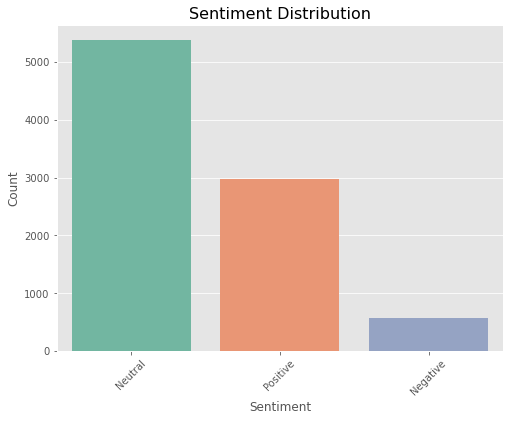

In [17]:
# Setting plot size and style
plt.figure(figsize=(8, 6))

# Plotting sentiment distribution using Seaborn's countplot
sns.countplot(x='Emotion', 
              data= data_cleaned, 
              order= data_cleaned['Emotion'].value_counts().index)

# Adding title and labels
plt.title('Sentiment Distribution', fontsize=16)
plt.xlabel('Sentiment', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Rotating x-axis labels for better readability
plt.xticks(rotation=45)

# Displaying the plot
plt.show()

The sentiment distribution graph clearly shows that the dataset is imbalanced, with the majority of tweets labeled as `Neutral`, followed by `Positive emotion,` while `Negative emotion` labels has significantly fewer instances.

This imbalance is something we'll need to address during the modeling phase, potentially through techniques like resampling or adjusting class weights.

## 2.4. Further Visualizations

We will now:

- **Distribution of Tweet Lengths:** A histogram to show how the lengths of the tweets are distributed.
- **Word Count Distribution:** A similar histogram for word count distribution.
- **Correlation Between Tweet Length and Sentiment:** Boxplots to visualize how the length of the tweets varies with sentiment.

### 1. Distribution of Tweet Lengths
This visualization will help us understand how the lengths of the tweets are distributed in the dataset.

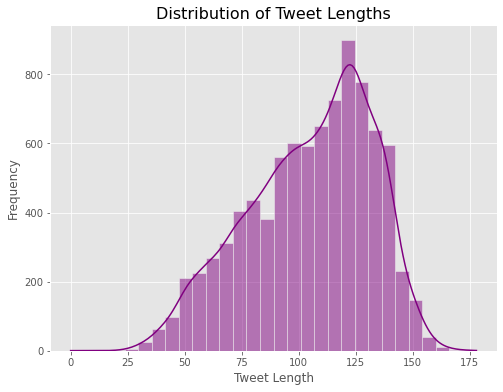

In [18]:
# Plotting distribution of tweet lengths
plt.figure(figsize=(8, 6))
sns.histplot(data_cleaned['tweet_length'], bins=30, kde=True, color='purple')
plt.title('Distribution of Tweet Lengths', fontsize=16)
plt.xlabel('Tweet Length', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

The histogram above illustrates the distribution of tweet lengths within the dataset. Key observations include:

- The distribution appears to be roughly normal, with a peak around 100-125 characters.
- Most tweets fall within the range of 75 to 140 characters, suggesting that the average tweet is relatively concise, likely conforming to Twitter's character limits.
- There are fewer tweets on both extremes (very short and very long), with a noticeable decline in frequency as the tweet length approaches the maximum of 178 characters.
- The data shows some variability, but the majority of tweets are clustered around the mean, indicating a consistent tweeting style among users.

### 2. Distribution of Word Count in Tweets
We will now visualize the word count in tweets, which helps us understand how concise or detailed the tweets are.

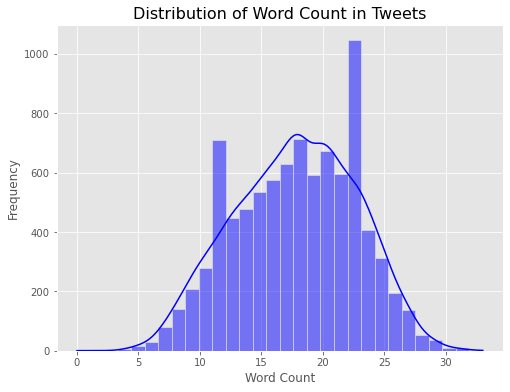

In [19]:
# Plotting distribution of word count
plt.figure(figsize=(8, 6))
sns.histplot(data_cleaned['word_count'], bins=30, kde=True, color='blue')
plt.title('Distribution of Word Count in Tweets', fontsize=16)
plt.xlabel('Word Count', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

The histogram shows that most tweets contain between 10 and 25 words, with a peak around 20 words. Shorter tweets (around 10 words) are also common, while very short or long tweets are rare. The distribution approximates a normal curve centered at 20 words.

### 3. Correlation Between Tweet Length and Sentiment
To understand if tweet length has any relation to sentiment, we will visualize the correlation using boxplots.

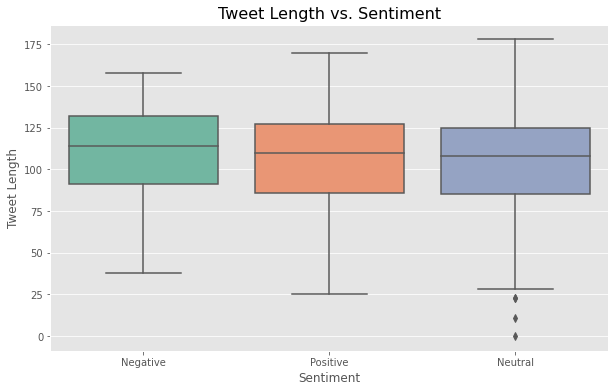

In [20]:
# Boxplot of tweet length by sentiment
plt.figure(figsize=(10, 6))
sns.boxplot(x='Emotion', y='tweet_length', data=data_cleaned)
plt.title('Tweet Length vs. Sentiment', fontsize=16)
plt.xlabel('Sentiment', fontsize=12)
plt.ylabel('Tweet Length', fontsize=12)
plt.show()

# 3. Data Preprocessing for NLP

## 3.1. Tokenization and Normalization

The goal of this step is to prepare the text for NLP tasks by transforming it into a consistent and analyzable format. We achieve this by:

1. Tokenization: Splitting the text into individual tokens (words).
2. Normalization: Converting text to lowercase and removing punctuation, numbers, and special characters.

After applying these steps, the text will be standardized, allowing for better processing in subsequent steps like vectorization.

In [21]:
import re
import nltk
nltk.download('punkt')  # Ensure you have the required tokenizer

# Tokenization and Normalization Function
def tokenize_and_normalize(text):
    # Convert text to lowercase
    text = text.lower()
    
    # Remove punctuation, numbers, and special characters
    text = re.sub(r'[^a-z\s]', '', text)
    
    # Tokenize the text
    tokens = nltk.word_tokenize(text)
    
    return tokens

# Apply the function to the cleaned text column
data_cleaned['tokens'] = data_cleaned['cleaned_text'].apply(tokenize_and_normalize)

# Display the tokenized text
data_cleaned[['cleaned_text', 'tokens']].head()

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,cleaned_text,tokens
0,i have a g iphone after hrs tweeting at it was dead i need to upgrade plugin stations at,"[i, have, a, g, iphone, after, hrs, tweeting, at, it, was, dead, i, need, to, upgrade, plugin, stations, at]"
1,know about awesome ipadiphone app that youll likely appreciate for its design also theyre giving free ts at,"[know, about, awesome, ipadiphone, app, that, youll, likely, appreciate, for, its, design, also, theyre, giving, free, ts, at]"
2,can not wait for also they should sale them down at,"[can, not, wait, for, also, they, should, sale, them, down, at]"
3,i hope this years festival isnt as crashy as this years iphone app,"[i, hope, this, years, festival, isnt, as, crashy, as, this, years, iphone, app]"
4,great stuff on fri marissa mayer google tim oreilly tech booksconferences amp matt mullenweg wordpress,"[great, stuff, on, fri, marissa, mayer, google, tim, oreilly, tech, booksconferences, amp, matt, mullenweg, wordpress]"


## 3.2. Stopwords Removal

In this step, we will remove common words (stopwords) that don't carry much meaningful information for text analysis. Stopwords are often words like `"the", "is", "in",` etc., which are frequently used but don’t contribute much to the overall meaning of a text.

**Goal:** Improve the quality of our text data by eliminating such words, leaving only the key terms that carry the most important meaning.

In [22]:
from nltk.corpus import stopwords

# Load the set of English stopwords from NLTK
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# Function to remove stopwords from tokenized text
def remove_stopwords(tokens):
    return [token for token in tokens if token.lower() not in stop_words]

# Apply the function to the tokens column
data_cleaned['tokens_no_stopwords'] = data_cleaned['tokens'].apply(remove_stopwords)

# Display the first few rows to check the result
data_cleaned[['tokens', 'tokens_no_stopwords']].head()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,tokens,tokens_no_stopwords
0,"[i, have, a, g, iphone, after, hrs, tweeting, at, it, was, dead, i, need, to, upgrade, plugin, stations, at]","[g, iphone, hrs, tweeting, dead, need, upgrade, plugin, stations]"
1,"[know, about, awesome, ipadiphone, app, that, youll, likely, appreciate, for, its, design, also, theyre, giving, free, ts, at]","[know, awesome, ipadiphone, app, youll, likely, appreciate, design, also, theyre, giving, free, ts]"
2,"[can, not, wait, for, also, they, should, sale, them, down, at]","[wait, also, sale]"
3,"[i, hope, this, years, festival, isnt, as, crashy, as, this, years, iphone, app]","[hope, years, festival, isnt, crashy, years, iphone, app]"
4,"[great, stuff, on, fri, marissa, mayer, google, tim, oreilly, tech, booksconferences, amp, matt, mullenweg, wordpress]","[great, stuff, fri, marissa, mayer, google, tim, oreilly, tech, booksconferences, amp, matt, mullenweg, wordpress]"


## 3.3. Stemming and Lemmatization

In this step, we will apply stemming or lemmatization to further normalize the tokens.

Stemming reduces words to their root form by removing suffixes (e.g., "running" becomes "run"). It's a more aggressive approach but might produce non-existent words.
Lemmatization is more linguistically accurate, converting words to their base or dictionary form (e.g., "running" becomes "run", and "better" becomes "good"). This method ensures the resulting words are real words.

For this project, we will use lemmatization as it tends to preserve the meaning better than stemming.

In [23]:
# Import the necessary NLTK downloader
import nltk

# Download the 'averaged_perceptron_tagger' resource for POS tagging
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')  # Download WordNet for lemmatization
nltk.download('omw-1.4')  # Optional: Download for expanded WordNet support

# Now, proceed with the original code
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet

# Initialize lemmatizer
lemmatizer = WordNetLemmatizer()

# Helper function to get part of speech (POS) tags for more accurate lemmatization
def get_pos_tag(word):
    # Mapping from POS tag to first character for lemmatizer
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {
        'J': wordnet.ADJ,
        'N': wordnet.NOUN,
        'V': wordnet.VERB,
        'R': wordnet.ADV
    }
    return tag_dict.get(tag, wordnet.NOUN)

# Function to apply lemmatization to tokens
def lemmatize_tokens(tokens):
    return [lemmatizer.lemmatize(token, get_pos_tag(token)) for token in tokens]

# Apply the lemmatization function to the tokens without stopwords
data_cleaned['tokens_lemmatized'] = data_cleaned['tokens_no_stopwords'].apply(lemmatize_tokens)

# Display the first few rows to check the result
data_cleaned[['tokens_no_stopwords', 'tokens_lemmatized']].head()


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


,tokens_no_stopwords,tokens_lemmatized
0,"[g, iphone, hrs, tweeting, dead, need, upgrade, plugin, stations]","[g, iphone, hr, tweet, dead, need, upgrade, plugin, station]"
1,"[know, awesome, ipadiphone, app, youll, likely, appreciate, design, also, theyre, giving, free, ts]","[know, awesome, ipadiphone, app, youll, likely, appreciate, design, also, theyre, give, free, t]"
2,"[wait, also, sale]","[wait, also, sale]"
3,"[hope, years, festival, isnt, crashy, years, iphone, app]","[hope, year, festival, isnt, crashy, year, iphone, app]"
4,"[great, stuff, fri, marissa, mayer, google, tim, oreilly, tech, booksconferences, amp, matt, mullenweg, wordpress]","[great, stuff, fri, marissa, mayer, google, tim, oreilly, tech, booksconferences, amp, matt, mullenweg, wordpress]"


## 3.4. Vectorization

### Steps for Vectorization

- **Ensure Cleaned Data is Present:** We will make sure that the cleaned data (after tokenization, normalization, stopwords removal, and lemmatization) is correctly defined and contains meaningful content.

- **Perform Vectorization:** Use `CountVectorizer` for `Bag of Words` representation and `TfidfVectorizer` for `TF-IDF` representation.

In [24]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

# Assuming 'tokens_lemmatized' is a column in your data_cleaned DataFrame
# and 'Emotion' is your target variable

# Join tokens (which are lists) back into strings
data_cleaned['tokens_lemmatized_str'] = data_cleaned['tokens_lemmatized'].apply(lambda tokens: ' '.join(tokens))

X = data_cleaned['tokens_lemmatized_str']  # Features (converted to strings)
y = data_cleaned['Emotion']  # Target variable (emotion)

# Train-test split (adjust test size as needed)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize TfidfVectorizer for TF-IDF
tfidf_vectorizer = TfidfVectorizer()

# Fit and transform the training data, and transform the test data
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Convert to DataFrame for better readability if needed (optional)
tfidf_train_df = pd.DataFrame(X_train_tfidf.toarray(), columns=tfidf_vectorizer.get_feature_names())
tfidf_test_df = pd.DataFrame(X_test_tfidf.toarray(), columns=tfidf_vectorizer.get_feature_names())

# Display TF-IDF representation for the training set
print("\nTF-IDF Representation (Training Set):")
print(tfidf_train_df.head())


TF-IDF Representation (Training Set):
   aapl  aaron   ab  abandon  abba  abc  aber  ability  able  abnormal  ...  \
0   0.0    0.0  0.0      0.0   0.0  0.0   0.0      0.0   0.0       0.0  ...   
1   0.0    0.0  0.0      0.0   0.0  0.0   0.0      0.0   0.0       0.0  ...   
2   0.0    0.0  0.0      0.0   0.0  0.0   0.0      0.0   0.0       0.0  ...   
3   0.0    0.0  0.0      0.0   0.0  0.0   0.0      0.0   0.0       0.0  ...   
4   0.0    0.0  0.0      0.0   0.0  0.0   0.0      0.0   0.0       0.0  ...   

   zite  zlf  zms  zombie  zomg  zone  zoom  zuckerberg  zynga  zzzs  
0   0.0  0.0  0.0     0.0   0.0   0.0   0.0         0.0    0.0   0.0  
1   0.0  0.0  0.0     0.0   0.0   0.0   0.0         0.0    0.0   0.0  
2   0.0  0.0  0.0     0.0   0.0   0.0   0.0         0.0    0.0   0.0  
3   0.0  0.0  0.0     0.0   0.0   0.0   0.0         0.0    0.0   0.0  
4   0.0  0.0  0.0     0.0   0.0   0.0   0.0         0.0    0.0   0.0  

[5 rows x 6925 columns]


### Key points about the output:

- **Sparsity:** Most of the values are 0.0, indicating that many words from the vocabulary don't appear in individual documents. This is common with text data, where only a small subset of words is present in any given document.

- **Vocabulary size:** In this case, the training set has 6,925 unique words (columns). These are the words that were identified from the training data and assigned TF-IDF scores.

- **Non-zero values:** When a word appears in a document, it is assigned a non-zero TF-IDF value. The higher the value, the more relevant that word is to the document in relation to the entire corpus.

## 3.5. Class Imbalance Handling

In [25]:
pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [26]:
# Import necessary libraries
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

# Join tokens (which are lists) back into strings
data_cleaned['tokens_lemmatized_str'] = data_cleaned['tokens_lemmatized'].apply(lambda tokens: ' '.join(tokens))

X = data_cleaned['tokens_lemmatized_str']  # Features (converted to strings)
y = data_cleaned['Emotion']  # Target variable (emotion)

# Train-test split (adjust test size as needed)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize TfidfVectorizer for TF-IDF
tfidf_vectorizer = TfidfVectorizer()

# Fit and transform the training data, and transform the test data
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Apply SMOTE to balance the classes in the training data
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_tfidf, y_train)

# Check the class distribution after applying SMOTE
print("Class distribution after SMOTE:")
print(y_train_balanced.value_counts())

# After this we can now proceed with training a model using X_train_balanced and y_train_balanced


Class distribution after SMOTE:
Positive    4328
Negative    4328
Neutral     4328
Name: Emotion, dtype: int64


In [27]:
# Print shapes to confirm sizes before SMOTE
print("Before SMOTE:")
print(f"X_train_tfidf shape: {X_train_tfidf.shape}")
print(f"y_train shape: {y_train.shape}")

Before SMOTE:
X_train_tfidf shape: (7132, 6925)
y_train shape: (7132,)


In [28]:
# Print shapes after SMOTE to confirm sizes
print("After SMOTE:")
print(f"X_train_balanced shape: {X_train_balanced.shape}")
print(f"y_train_balanced shape: {y_train_balanced.shape}")

After SMOTE:
X_train_balanced shape: (12984, 6925)
y_train_balanced shape: (12984,)


The output shows that the classes have been successfully balanced using SMOTE, with each class (Neutral, Positive, Negative) now having 4,328 samples.

# 4. Modeling

## 4.1. Model 1: Binary Classification (Positive vs. Negative)

### 4.1.1. Model Selection

We will begin with a binary classifier focusing on distinguishing between Positive and Negative emotions. For this, let's select two baseline models:

1. Naive Bayes (specifically `MultinomialNB` since we are dealing with text data).

2. Logistic Regression.

Let's start with these two models.

In [29]:
# Import necessary libraries
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Filter out Neutral samples for binary classification in the training set
binary_train_mask = y_train_balanced != 'Neutral'
binary_test_mask = y_test != 'Neutral'

# Subset the training and test sets
X_train_binary = X_train_balanced[binary_train_mask]
y_train_binary = y_train_balanced[binary_train_mask]
X_test_binary = X_test_tfidf[binary_test_mask]
y_test_binary = y_test[binary_test_mask]

# Convert target labels to binary (1 for Positive, 0 for Negative)
y_train_binary = y_train_binary.map({'Positive': 1, 'Negative': 0})
y_test_binary = y_test_binary.map({'Positive': 1, 'Negative': 0})

# Initialize models
nb_model = MultinomialNB()
logreg_model = LogisticRegression(max_iter=1000, random_state=42)


### 4.1.2. Model Training

We will now train both models on the binary classification task.

In [30]:
# Train Naive Bayes
nb_model.fit(X_train_binary, y_train_binary)

# Train Logistic Regression
logreg_model.fit(X_train_binary, y_train_binary)

LogisticRegression(max_iter=1000, random_state=42)

### 4.1.3. Model Evaluation

We will evaluate the performance of both models using several metrics:

1. Accuracy
2. Precision, Recall, and F1-Score for each class.
3. ROC-AUC for binary classification.

Naive Bayes Model Evaluation:
Accuracy: 0.8272108843537415

Classification Report (Naive Bayes):
              precision    recall  f1-score   support

           0       0.52      0.67      0.58       133
           1       0.92      0.86      0.89       602

    accuracy                           0.83       735
   macro avg       0.72      0.77      0.74       735
weighted avg       0.85      0.83      0.84       735


Confusion Matrix (Naive Bayes):
[[ 89  44]
 [ 83 519]]

Logistic Regression Model Evaluation:
Accuracy: 0.854421768707483

Classification Report (Logistic Regression):
              precision    recall  f1-score   support

           0       0.58      0.68      0.63       133
           1       0.93      0.89      0.91       602

    accuracy                           0.85       735
   macro avg       0.76      0.79      0.77       735
weighted avg       0.87      0.85      0.86       735


Confusion Matrix (Logistic Regression):
[[ 91  42]
 [ 65 537]]
ROC-AUC (Logisti

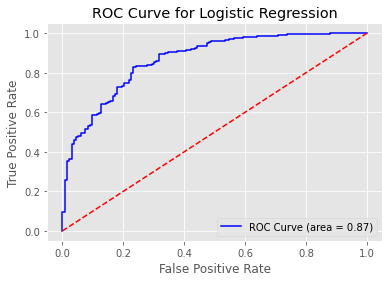

In [31]:
# Make predictions on the test data
y_pred_nb = nb_model.predict(X_test_binary)
y_pred_logreg = logreg_model.predict(X_test_binary)

# Evaluate Naive Bayes
print("Naive Bayes Model Evaluation:")
print("Accuracy:", accuracy_score(y_test_binary, y_pred_nb))
print("\nClassification Report (Naive Bayes):")
print(classification_report(y_test_binary, y_pred_nb))
print("\nConfusion Matrix (Naive Bayes):")
print(confusion_matrix(y_test_binary, y_pred_nb))

# Evaluate Logistic Regression
print("\nLogistic Regression Model Evaluation:")
print("Accuracy:", accuracy_score(y_test_binary, y_pred_logreg))
print("\nClassification Report (Logistic Regression):")
print(classification_report(y_test_binary, y_pred_logreg))
print("\nConfusion Matrix (Logistic Regression):")
print(confusion_matrix(y_test_binary, y_pred_logreg))

# ROC-AUC Score for Logistic Regression
y_pred_logreg_proba = logreg_model.predict_proba(X_test_binary)[:, 1]
roc_auc = roc_auc_score(y_test_binary, y_pred_logreg_proba)
print(f"ROC-AUC (Logistic Regression): {roc_auc}")

# Plot ROC Curve for Logistic Regression
fpr, tpr, _ = roc_curve(y_test_binary, y_pred_logreg_proba)
plt.figure()
plt.plot(fpr, tpr, color='blue', label=f"ROC Curve (area = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Logistic Regression')
plt.legend(loc="lower right")
plt.show()

### Model Comparison Summary

1. **Naive Bayes:**

- Accuracy: `82.7%`
- Strength in predicting `Class 1 (Positive)` with a precision of `0.92`, but struggles with `Class 0 (Negative)` with a precision of `0.52`.
- F1-score for Class 0 is relatively low `(0.58)`, reflecting issues with false positives.

2. **Logistic Regression:**

- Accuracy: `85.4%` (higher than Naive Bayes).
- Better performance overall, especially for Class 0, with improved precision (`0.58`) and F1-score (`0.63`).
- ROC-AUC: `0.87`, showing a good ability to distinguish between classes.

**Conclusion:** Logistic Regression outperforms Naive Bayes, providing better precision, recall, and overall class balance, particularly in handling the minority class (Class 0).

### Comparison of evaluation metrics

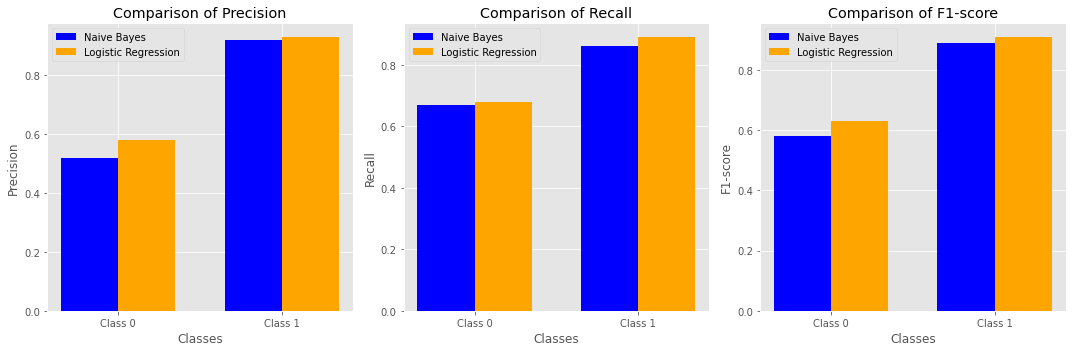

In [32]:
# Import necessary libraries
import matplotlib.pyplot as plt
import numpy as np

# Define the metrics for both models (precision, recall, f1-score)
metrics_nb = {
    'Class 0': {'precision': 0.52, 'recall': 0.67, 'f1-score': 0.58},
    'Class 1': {'precision': 0.92, 'recall': 0.86, 'f1-score': 0.89}
}

metrics_lr = {
    'Class 0': {'precision': 0.58, 'recall': 0.68, 'f1-score': 0.63},
    'Class 1': {'precision': 0.93, 'recall': 0.89, 'f1-score': 0.91}
}

# Plot the comparison for precision, recall, and f1-score
classes = ['Class 0', 'Class 1']
metrics = ['precision', 'recall', 'f1-score']

fig, ax = plt.subplots(1, 3, figsize=(15, 5))

for i, metric in enumerate(metrics):
    nb_scores = [metrics_nb[cls][metric] for cls in classes]
    lr_scores = [metrics_lr[cls][metric] for cls in classes]

    bar_width = 0.35
    index = np.arange(len(classes))

    ax[i].bar(index, nb_scores, bar_width, label='Naive Bayes', color='blue')
    ax[i].bar(index + bar_width, lr_scores, bar_width, label='Logistic Regression', color='orange')

    ax[i].set_title(f'Comparison of {metric.capitalize()}')
    ax[i].set_xlabel('Classes')
    ax[i].set_ylabel(metric.capitalize())
    ax[i].set_xticks(index + bar_width / 2)
    ax[i].set_xticklabels(classes)
    ax[i].legend()

# Show the plot
plt.tight_layout()
plt.show()

## 4.2. Model 2: Multiclass Classification (Positive, Negative, Neutral)

In this step, we will perform multiclass classification using three models:

- Multinomial Naive Bayes
- Logistic Regression
- Random Forest

### 4.2.1. Model Selection

In [33]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# 1. Fit the models on the balanced training set
nb_multiclass = MultinomialNB()
nb_multiclass.fit(X_train_balanced, y_train_balanced)

log_reg_multiclass = LogisticRegression(max_iter=1000)
log_reg_multiclass.fit(X_train_balanced, y_train_balanced)

rf_multiclass = RandomForestClassifier()
rf_multiclass.fit(X_train_balanced, y_train_balanced)

# 2. Make predictions using the fitted models
nb_pred = nb_multiclass.predict(X_test_tfidf)
log_reg_pred = log_reg_multiclass.predict(X_test_tfidf)
rf_pred = rf_multiclass.predict(X_test_tfidf)

# Evaluation for Multinomial Naive Bayes
print("\nMultinomial Naive Bayes Evaluation:")
print("Accuracy:", accuracy_score(y_test, nb_pred))
print(classification_report(y_test, nb_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, nb_pred))

# Evaluation for Logistic Regression
print("\nLogistic Regression Evaluation:")
print("Accuracy:", accuracy_score(y_test, log_reg_pred))
print(classification_report(y_test, log_reg_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, log_reg_pred))

# Evaluation for Random Forest
print("\nRandom Forest Evaluation:")
print("Accuracy:", accuracy_score(y_test, rf_pred))
print(classification_report(y_test, rf_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, rf_pred))



Multinomial Naive Bayes Evaluation:
Accuracy: 0.5844083006169377
              precision    recall  f1-score   support

    Negative       0.29      0.62      0.40       133
     Neutral       0.77      0.55      0.64      1048
    Positive       0.51      0.64      0.57       602

    accuracy                           0.58      1783
   macro avg       0.52      0.60      0.53      1783
weighted avg       0.65      0.58      0.60      1783

Confusion Matrix:
 [[ 82  26  25]
 [135 573 340]
 [ 65 150 387]]

Logistic Regression Evaluation:
Accuracy: 0.6427369601794728
              precision    recall  f1-score   support

    Negative       0.35      0.58      0.44       133
     Neutral       0.75      0.68      0.72      1048
    Positive       0.58      0.59      0.58       602

    accuracy                           0.64      1783
   macro avg       0.56      0.62      0.58      1783
weighted avg       0.66      0.64      0.65      1783

Confusion Matrix:
 [[ 77  34  22]
 [ 94 713 2

### Overall Observations

- **Accuracy Comparison:**

    Binary models (especially Logistic Regression) outperformed multiclass models, achieving higher accuracy rates `(up to 85.44% for Logistic Regression)` compared to the highest multiclass accuracy of `68.09% (Random Forest)`.

- **Class Prediction Strength:**

    In binary classification, both models excelled at classifying Positive instances, while the multiclass models struggled with Negative class predictions across the board. Multinomial Naive Bayes, in particular, had low precision and F1-scores for the Negative class.

Given the performance discrepancies, the next step will involve hyperparameter tuning to optimize the multiclass models, particularly focusing on improving the classification of the Negative class and overall model accuracy. This will be accomplished using `GridSearchCV` for hyperparameter optimization on the selected multiclass models.

### 4.2.2. Hyperparameter Tuning

We'll use `GridSearchCV` to optimize hyperparameters for the multiclass models, focusing on the following models: *Multinomial Naive Bayes*, *Logistic Regression*, and *Random Forest*.

We'll define a parameter grid for each model and use GridSearchCV to find the best parameters based on `cross-validated performance`.

In [34]:
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import MultinomialNB

# Define parameter grid for MultinomialNB
param_grid_nb = {
    'alpha': [0.1, 0.5, 1.0, 1.5, 2.0]  # Smoothing parameter for MultinomialNB
}

# Initialize GridSearchCV for MultinomialNB
grid_nb = GridSearchCV(MultinomialNB(), param_grid_nb, cv=5, scoring='accuracy', verbose=1)

# Fit the model on the balanced training data
print("Tuning Multinomial Naive Bayes...")
grid_nb.fit(X_train_balanced, y_train_balanced)

# Best parameters for MultinomialNB
print("Best parameters for Multinomial Naive Bayes:", grid_nb.best_params_)


Tuning Multinomial Naive Bayes...
Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Best parameters for Multinomial Naive Bayes: {'alpha': 0.1}


[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    2.3s finished


In [35]:
from sklearn.linear_model import LogisticRegression

# Define parameter grid for Logistic Regression
param_grid_lr = {
    'C': [0.01, 0.1, 1, 10, 100],  # Inverse of regularization strength
    'max_iter': [100, 200, 300]  # Maximum number of iterations for convergence
}

# Initialize GridSearchCV for Logistic Regression
grid_lr = GridSearchCV(LogisticRegression(), param_grid_lr, cv=5, scoring='accuracy', verbose=1)

# Fit the model on the balanced training data
print("Tuning Logistic Regression...")
grid_lr.fit(X_train_balanced, y_train_balanced)

# Best parameters for Logistic Regression
print("Best parameters for Logistic Regression:", grid_lr.best_params_)


Tuning Logistic Regression...
Fitting 5 folds for each of 15 candidates, totalling 75 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\USER\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\USER\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternativ

C:\Users\USER\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\USER\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#l

Best parameters for Logistic Regression: {'C': 100, 'max_iter': 100}


C:\Users\USER\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Define parameter grid for Random Forest
param_grid_rf = {
    'n_estimators': [50, 100, 200],  # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],  # Maximum depth of the trees
    'min_samples_split': [2, 5, 10],  # Minimum samples required to split an internal node
}

# Initialize GridSearchCV for Random Forest
grid_rf = GridSearchCV(RandomForestClassifier(), param_grid_rf, cv=5, scoring='accuracy', verbose=1)

# Fit the model on the balanced training data
print("Tuning Random Forest...")
grid_rf.fit(X_train_balanced, y_train_balanced)

# Best parameters for Random Forest
print("Best parameters for Random Forest:", grid_rf.best_params_)


Tuning Random Forest...
Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


### 4.2.3. Model Evaluation

## 4.3. Advanced Models

### 4.3.1. Experiment with Word2Vec or GloVe embeddings

### 4.3.2. Use BERT for Sentiment Classification

### 4.3.3. Model Evaluation: (comparison with the simpler models above)

# 5. Model Explainability

## 5.1. SHAP or LIME Interpretation

Use SHAP or LIME to explain which features (words or n-grams) contributed most to model decisions.

- *Visualize and interpret feature importance for each sentiment class.*

# 6. Validation Strategy

## 6.1. Cross-Validation

## 6.2. Final Model Selection

# 7. Conclusion

## 7.1. Business Insights

## 7.2. Model Performance Overview

## 7.3. Future Work